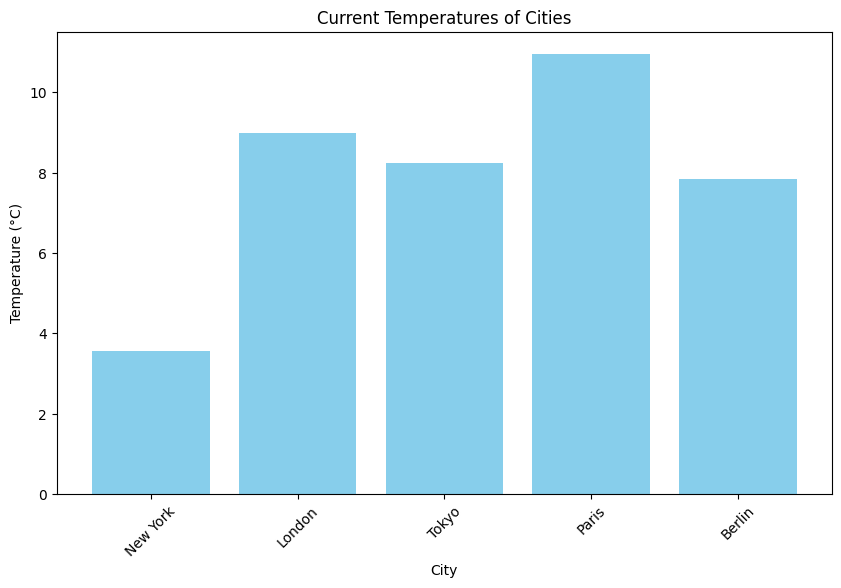


City with the highest temperature:
City                   Paris
Temperature            10.96
Weather        broken clouds
Humidity                  82
Name: 3, dtype: object

City with the lowest temperature:
City                New York
Temperature             3.56
Weather        broken clouds
Humidity                  49
Name: 0, dtype: object


In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Your OpenWeatherMap API key (replace with your actual key)
API_KEY = '2f1713d233ce4d0e3f80a4938689cef9'  # Replace with your valid API key

# List of cities to retrieve weather data for
cities = ['New York', 'London', 'Tokyo', 'Paris', 'Berlin']

# Base URL for OpenWeatherMap API
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

# List to store weather data
weather_data = []

# Fetch weather data for each city
for city in cities:
    params = {
        'q': city,
        'appid': API_KEY,
        'units': 'metric'  # Get temperature in Celsius
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    
    if response.status_code == 200:  # Check if request was successful
        city_weather = {
            'City': city,
            'Temperature': data['main']['temp'],
            'Weather': data['weather'][0]['description'],
            'Humidity': data['main']['humidity']
        }
        weather_data.append(city_weather)
    else:
        print(f"Error retrieving data for {city}: {data.get('message', 'Unknown error')}")

# Check if we have data to create the DataFrame
if weather_data:
    # Create a DataFrame from the weather data
    df = pd.DataFrame(weather_data)

    # Create a bar chart of the temperatures
    plt.figure(figsize=(10, 6))
    plt.bar(df['City'], df['Temperature'], color='skyblue')
    plt.title('Current Temperatures of Cities')
    plt.xlabel('City')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.show()

    # Identify the city with the highest and lowest temperatures
    max_temp_city = df.loc[df['Temperature'].idxmax()]
    min_temp_city = df.loc[df['Temperature'].idxmin()]

    print("\nCity with the highest temperature:")
    print(max_temp_city)

    print("\nCity with the lowest temperature:")
    print(min_temp_city)

else:
    print("No weather data available. Please check your API key and network connection.")
